In [1]:
# Question : 2

# importing libraries
from collections import defaultdict
from sklearn.metrics import PrecisionRecallDisplay
import math
import matplotlib.pyplot as plt

In [2]:
# reading data
with open("IR-assignment-2-data.txt", "r") as file1:
    FileasList = file1.readlines() # readlines 
    


In [3]:
# Question 2.2
rel_row_full = [] # list to store (relevance, every row)
rel_row_q4 = defaultdict(list) # dictionary with : key -> relevance, value -> full row
rel_row_list_q4 = [] # list to store (relevance, every row) with qid = 4
for line in FileasList:
    col = line.split() # split and convert to list
    rel_row_full.append([int(col[0]), col])  # store the relevance and row data
    if col[1] == "qid:4": # given that qid:4
        rel_row_q4[int(col[0])].append(col)
        rel_row_list_q4.append([int(col[0]), col])


In [4]:
rel_row_list_q4_sorted = reversed(sorted(rel_row_list_q4)) # sort in reverse order
dcg, count = 0, 1
for first, sec in rel_row_list_q4_sorted:
    # using formula r1 + sigma(ri/log2(i)) : i = 2 to n
    if count == 1:
        dcg += int(first)
    else:
        dcg += int(first)/math.log2(count)
    count += 1
print("DCG for qid:4 = ", dcg)

DCG for qid:4 =  20.989750804831445


In [5]:
# total number of arrangements.
totalPossibleArrangement = 1
for key, val in rel_row_q4.items():
    totalPossibleArrangement *= math.factorial(len(val))
print("Total Possiblle arrangements with max dcg = ", totalPossibleArrangement)

Total Possiblle arrangements with max dcg =  19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


In [6]:
def calculateNDCG(rel_row_full):
    # ndcg : normalized dcg
    # maxdcg : maximum dcg (can be obtanined by sorting in reverse order and using dcg formula)
    ndcg, dcg, maxdcg, count = 0, 0, 0, 1
    for first, sec in rel_row_full:
        # using formula r1 + sigma(ri/log2(i)) : i = 2 to n
        if count == 1:
            dcg += int(first)
        else:
            dcg += int(first)/math.log2(count)
        count += 1
    count = 1
    # sorted to get the max dcg
    sorted_rel_row_full = reversed(sorted(rel_row_full))

    for first, sec in sorted_rel_row_full:
        # using formula r1 + sigma(ri/log2(i)) : i = 2 to n
        if count == 1:
            maxdcg += int(first)
        else:
            maxdcg += int(first)/math.log2(count)
        count += 1

    ndcg = dcg/maxdcg
    print(ndcg) 

In [7]:
# Question 2.3 

# a)
# compute ndcg for 50 documents

calculateNDCG(rel_row_list_q4[:50])

# b)
# compute ndcg for whole documents
calculateNDCG(rel_row_list_q4)

0.5253808413557646
0.5979226516897831


In [8]:
wholeDocRelList = [] # each element : [wholeDoc, rel]
realRel = [] # relevance stored

for rel, row in rel_row_list_q4:
    # print(rel, row)
    rel = 0 if rel == 0 else 1
    wholeDoc = float(row[76][row[76].index(":")+1:]) # slicing and changing type to float of 75th column
    # print(wholeDoc)
    wholeDocRelList.append([ wholeDoc, rel])

wholeDocRelList.sort(reverse = True)
print(wholeDocRelList)
realRel = [sec for first, sec in wholeDocRelList]
print(realRel)

[[972.826451, 0], [612.893205, 0], [571.500533, 0], [538.388954, 0], [528.520116, 1], [463.099129, 0], [439.396463, 1], [411.010633, 1], [316.319283, 0], [311.705149, 1], [305.102064, 0], [296.023694, 1], [292.184568, 1], [270.13233, 1], [237.21632, 1], [237.21632, 1], [226.444023, 0], [217.848266, 1], [212.401296, 0], [202.442155, 1], [201.720933, 0], [200.840161, 1], [200.840161, 0], [198.480212, 1], [192.953467, 1], [188.936782, 1], [188.129935, 0], [187.934366, 0], [186.375414, 0], [185.617459, 0], [180.720002, 0], [180.24324, 1], [177.168378, 0], [176.875026, 1], [176.000104, 0], [169.844071, 0], [166.683125, 1], [161.455583, 1], [161.455583, 0], [161.15638, 1], [157.05992, 1], [156.301965, 1], [148.415271, 0], [148.415271, 0], [144.564444, 0], [143.769297, 0], [143.445062, 1], [142.9683, 0], [142.589323, 1], [142.589323, 0], [142.038637, 1], [140.479685, 1], [130.655061, 0], [121.96152, 1], [121.814843, 1], [121.007996, 0], [108.548081, 1], [103.400313, 1], [98.418404, 0], [98.14

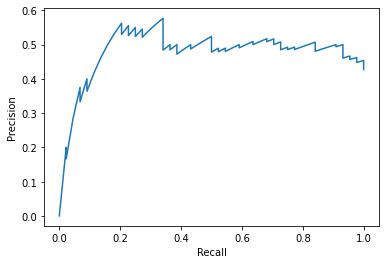

In [9]:
# Question 2.4
precision_list = [] # list to store precision
recall_list = [] # list to store recall

relevant_till_now_count = 0 # relevant count while processing
total_relevant_count  = sum(realRel)
for i in range(1, len(realRel)+1):
    relevant_till_now_count  += realRel[i-1] 
    precision_list.append(relevant_till_now_count/i) # keeping track of precision
    recall_list.append(relevant_till_now_count/total_relevant_count) # keeping track of recall
plt.plot(recall_list, precision_list)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# plot of recall-precision shown here